# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [5]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [6]:
# add code here
housing_data_path="/content/gdrive/MyDrive/synapse_w2/housing_data.csv"
housing_data_df=pd.read_csv(housing_data_path)
print(housing_data_df.head())

   Avg. Area Income  ...                                            Address
0      79545.458574  ...  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455  ...  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179  ...  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046  ...                          USS Barnett\nFPO AP 44820
4      59982.197226  ...                         USNS Raymond\nFPO AE 09386

[5 rows x 7 columns]


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [7]:
# add code here
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [8]:
# add code here
housing_data_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [9]:
# add code here
for col in housing_data_df.columns:
  print(col)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

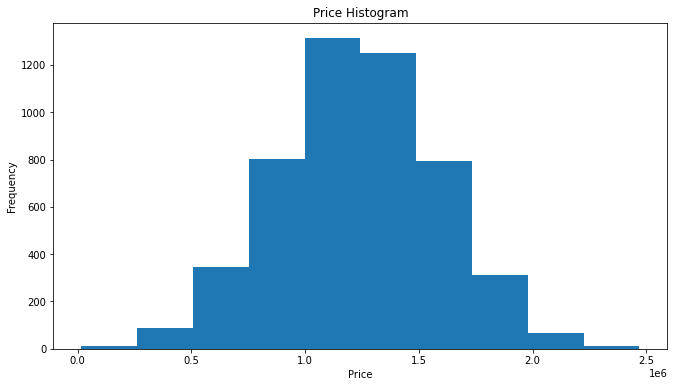

In [10]:
# add code here
Price=housing_data_df.Price
fig=plt.figure(figsize=(11,6))
plt.hist(Price,bins=10)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Histogram")
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [11]:
# add code here
housing_data_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [12]:
# add code here
cols=housing_data_df.columns
X=housing_data_df.drop(columns=["Address","Price"],axis=1)
print(X.shape)
y=housing_data_df.Price
print(y.shape)

(5000, 5)
(5000,)


In [13]:
# This code should print (5000, 5) and (5000,) if everything is correct


In [14]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [15]:
# print a few record of y
# add code here
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [16]:
# add code here
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [17]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=100)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [18]:
# add code here
print(X_train.size)
print(X_train.shape)
print(X_test.size)
print(X_test.shape)
print(y_train.size)
print(y_train.shape)
print(y_test.size)
print(y_test.shape)

17500
(3500, 5)
7500
(1500, 5)
3500
(3500,)
1500
(1500,)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [19]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm=LinearRegression()



**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [20]:
# add code here
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [21]:
# add code here
predictions=lm.predict(X_test)
print(predictions.dtype)
print(predictions.size)
print(predictions.shape)

float64
1500
(1500,)


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

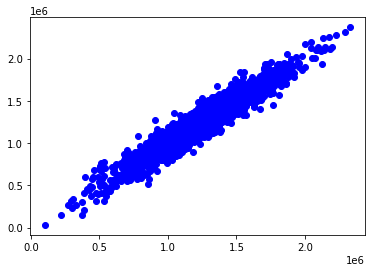

In [22]:
# add code here
plt.scatter(predictions,y_test,color="blue")

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [23]:
# add code here
from sklearn.metrics import r2_score
r2_score=r2_score(predictions,y_test)
print(round(r2_score,3))

0.911


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [24]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [25]:
# add code here
df_path='/content/gdrive/MyDrive/synapse_w2/classified_data.txt'
df=pd.read_csv(df_path,index_col=0)
print(df.head())
print(df)



        WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0  0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1  0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2  0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3  1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4  1.279491  0.949750  0.627280  ...  1.463812  1.419167             1

[5 rows x 11 columns]
          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  

### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [26]:
# add code here
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [27]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [28]:
# add code here
col=df.columns
l=len(col)



**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

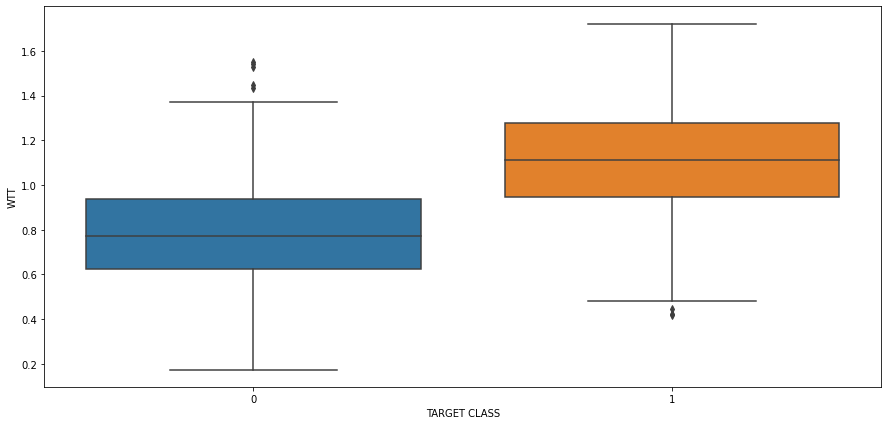

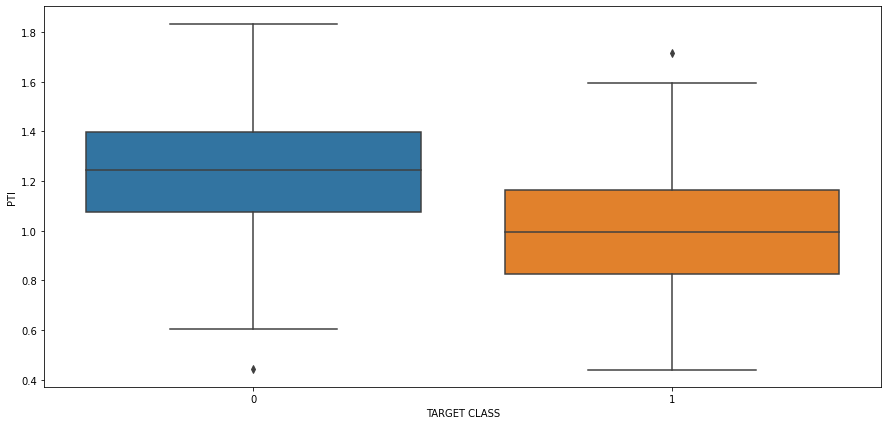

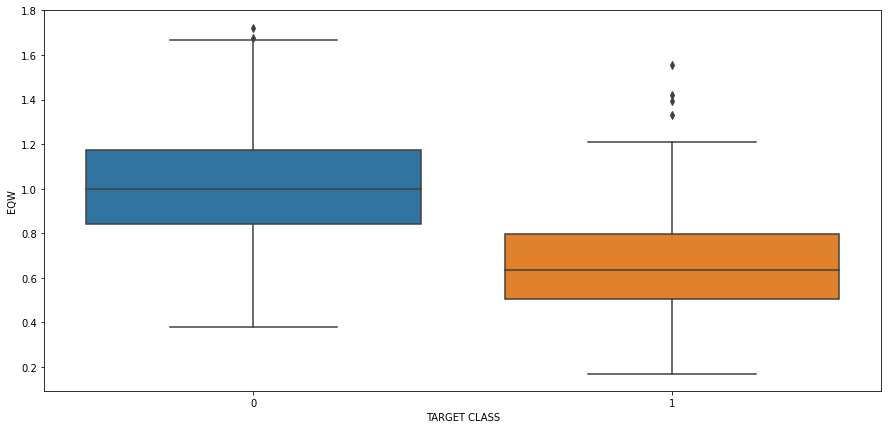

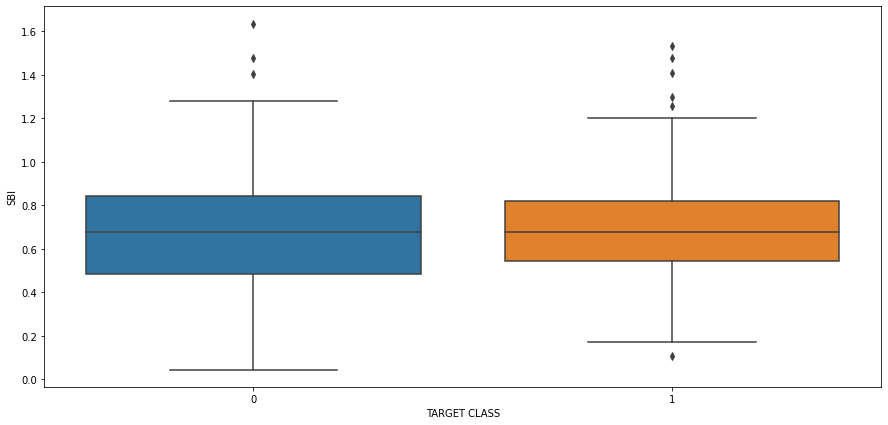

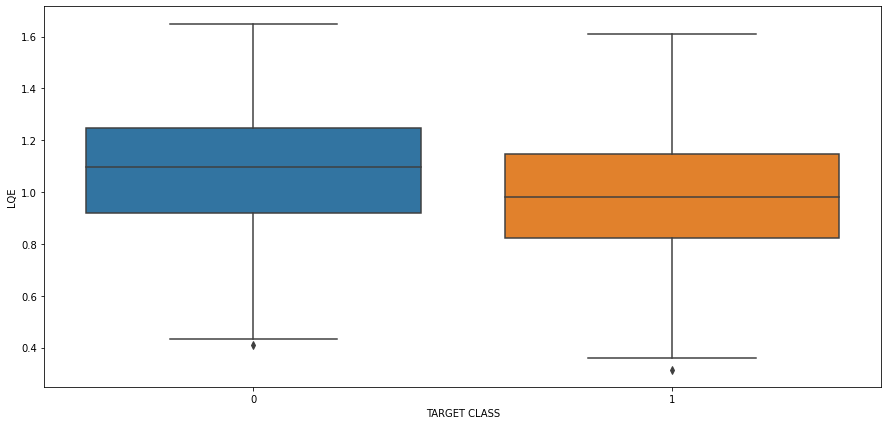

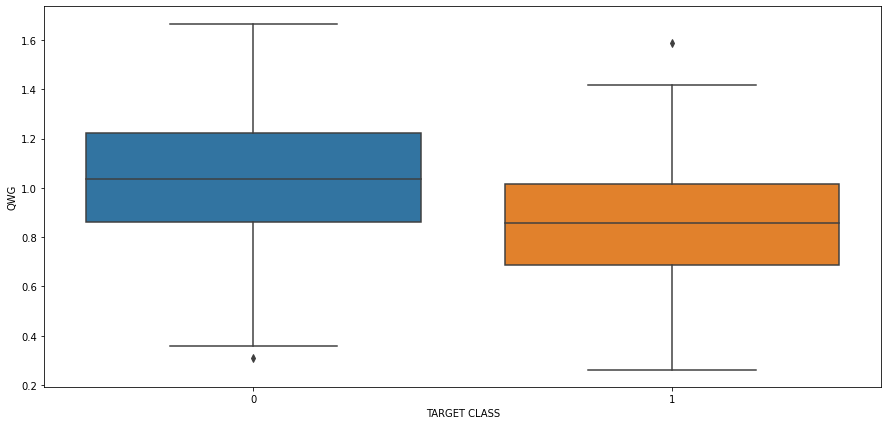

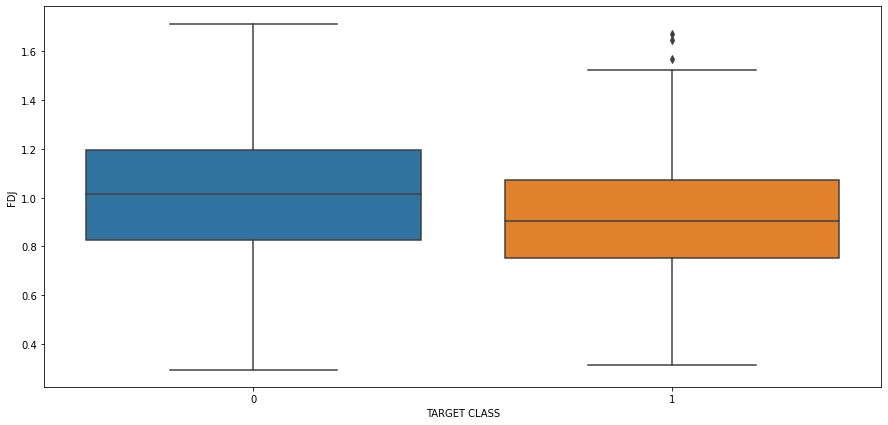

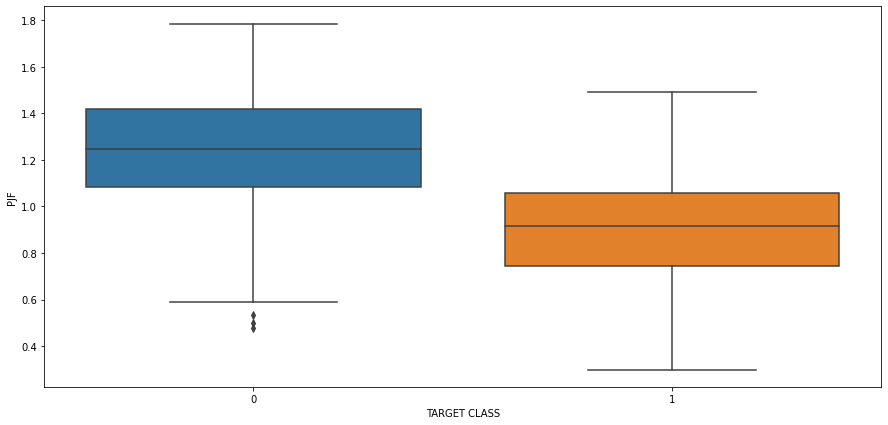

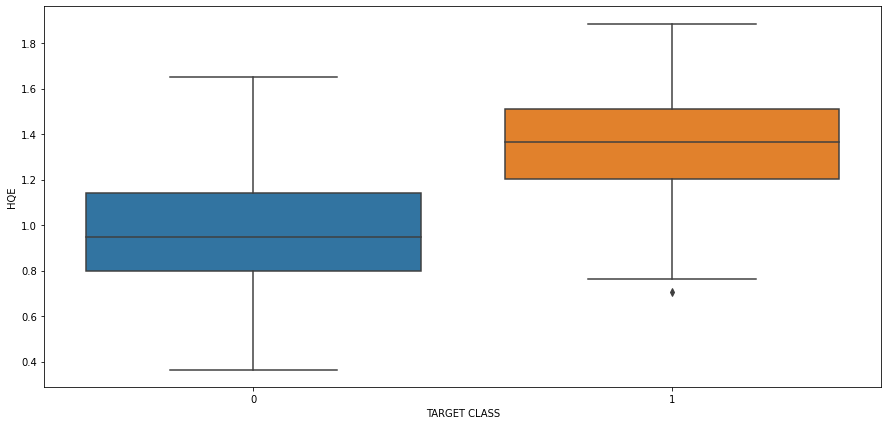

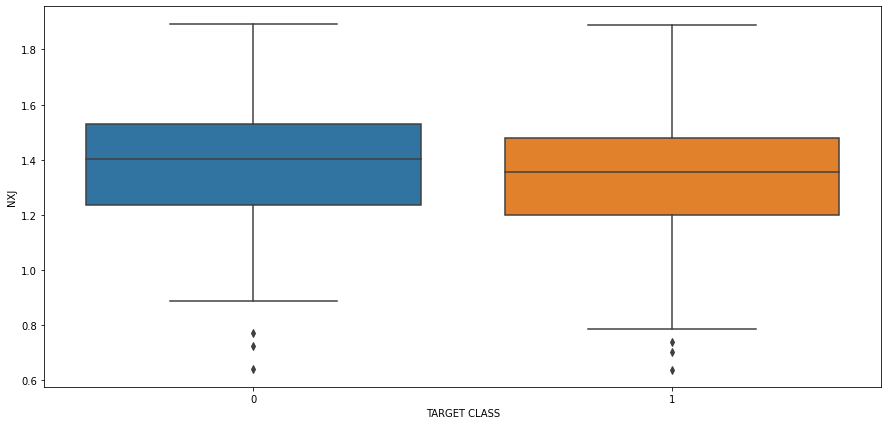

In [29]:

for i in range(len(col)-1):
  plt.figure(figsize=[15,7])
  sns.boxplot(x='TARGET CLASS',y=col[i],data=df)
  plt.show()




### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [315]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [316]:
# add code here
df2=df.drop(columns="TARGET CLASS",axis=1)
scaler.fit(df2)
transformed=scaler.transform(df2)


**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [317]:
# add code here
df_feat=pd.DataFrame(transformed,columns=['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ'])
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [318]:
# add code here
X=df_feat
y=df['TARGET CLASS']


**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [319]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [320]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [321]:
# add code here
pred=neigh.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [322]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.95      0.90      0.93       162
           1       0.89      0.95      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [323]:
# add code here
N=y_test.shape
accuracy=(y_test == pred).sum()/N
print(round(accuracy[0],3))

0.923


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [324]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
acc=[]
for n in range(1,61):
  neigh=KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train,y_train)
  pred=neigh.predict(X_test)
  N=y_test.shape
  accuracy=(y_test == pred).sum()/N
  acc.append(accuracy[0])
print(acc)
# add code here


[0.9233333333333333, 0.9366666666666666, 0.9133333333333333, 0.93, 0.92, 0.93, 0.9166666666666666, 0.9266666666666666, 0.93, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.9366666666666666, 0.9333333333333333, 0.93, 0.93, 0.93, 0.9333333333333333, 0.9366666666666666, 0.94, 0.9366666666666666, 0.9366666666666666, 0.9366666666666666, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9266666666666666, 0.9266666666666666, 0.93, 0.9333333333333333, 0.93, 0.9333333333333333, 0.9266666666666666, 0.9266666666666666, 0.93, 0.93, 0.93, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.93, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9333333333333333, 0.9333333333333

**Plot a graph of K value vs Accuracy**

Text(0.5, 1.0, 'K Vs acc')

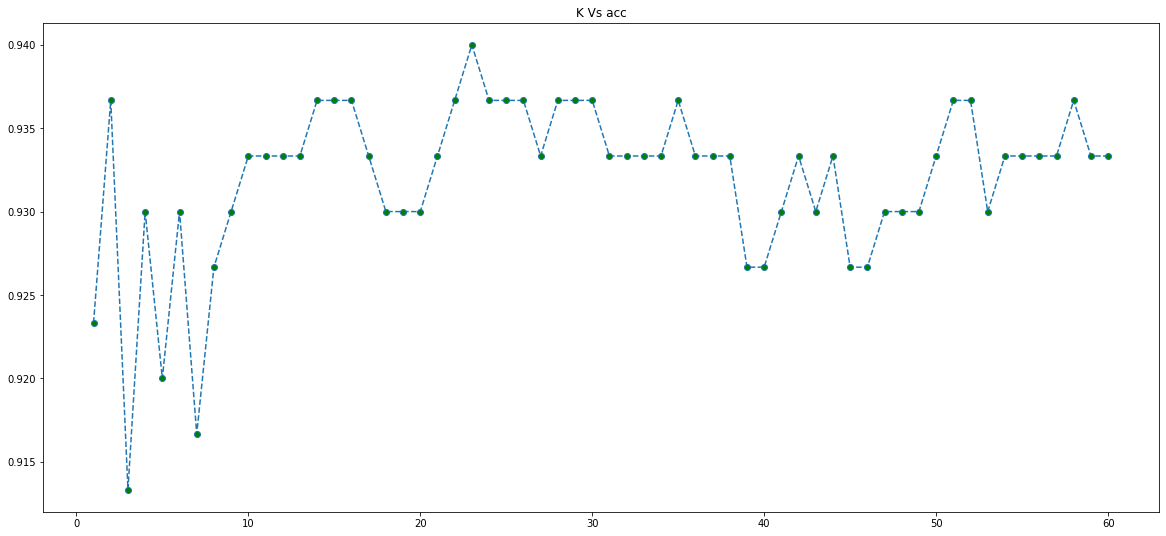

In [325]:
# add code here
plt.figure(figsize=(20,9))
plt.plot(range(1,61),acc,linestyle="dashed",marker="o",markerfacecolor="green",markersize=6)
plt.title('K Vs acc')

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [326]:
# add code here 

In [327]:
#n_neighbors=54
#Since after 54 the accuracy does not decrease we consider n_neighbor=54
neighbor=KNeighborsClassifier(n_neighbors=54)
neighbor.fit(X_train,y_train)
pred=neighbor.predict(X_test)
N=y_test.size
Acc=(y_test == pred).sum()/N
print(round(Acc,3))

0.933


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [328]:
#write code here
data_path="/content/gdrive/MyDrive/synapse_w2/titanic_data.csv"
DF=pd.read_csv(data_path)
DF


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [329]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new
import re
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
    title_list = []
    for i in df["Name"]:
      title_search = re.search('(\w+)\.', i)
      if title_search:
        title = title_search.group(1)
        title_list.append(title)

    df["Title"] = title_list
    df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    df.drop(["Cabin"], axis=1, inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Family_members"] = df["SibSp"] + df["Parch"]
    df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    df["Age"] = normalize(df["Age"])
    df["Fare"] = normalize(df["Fare"])
    df["Family_members"] = normalize(df["Family_members"])
    df_ohe = pd.get_dummies(df, columns=["Pclass", "Sex","Title", "Embarked"])
    return df_ohe

# print(titanic_preprocessing_pipeline(DF))
Df=titanic_preprocessing_pipeline(DF)
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
 #remove this line after writing the code

In [330]:
Df.head()

,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [331]:
Df.shape

(891, 29)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [332]:
#write code here
y=Df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<b>remove the y_label (survived) from the dataframe</b>

In [336]:
#write code here
X=Df
X

,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [337]:
#write code here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [353]:
#write code here

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [354]:
y_pred=clf.predict(X_test)
train_pred=clf.predict(X_train)

<b>print the test accuracy and train accuracy here</b>

In [361]:
#write code here

print("Test accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("Train accuracy: ",metrics.accuracy_score(y_train,train_pred))

Test accuracy:  0.7686567164179104
Train accuracy:  0.9903691813804173


In [357]:
from sklearn.model_selection import GridSearchCV
params={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,None],
    "min_samples_split":[2,3,4,5,6],
    "min_samples_leaf":[2,4,6,8,10,None],
    }

grid=GridSearchCV(clf,param_grid=params,cv=10,n_jobs=-1)

In [360]:
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'best'}
0.8380440348182283
